In [2]:
rm(list=ls())
library(car)
library(bestglm)
library(leaps)
setwd("D:/2019 Fall/STAT 628/module 2")
data = read.csv("data.cleaned.csv")[,-1]
m = lm(data$DENSITY~.,data)
cat("The maximum vif value of design matrix X is: ",max(vif(m)),sep="")
mat = as.matrix(data[-1])
cat("\n The k condition number of design matrix X is: ",max(eigen(t(mat)%*%mat)$values)/min(eigen(t(mat)%*%mat)$values),sep="")


The maximum vif value of design matrix X is: 124.5388
 The k condition number of design matrix X is: 342589.4

### Review of original linear regression model


Call:
lm(formula = DENSITY ~ ., data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0218836 -0.0066880  0.0003936  0.0068992  0.0209215 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.162e+00  9.017e-02  12.882  < 2e-16 ***
AGE         -1.709e-04  7.249e-05  -2.357 0.019235 *  
WEIGHT       2.299e-04  2.519e-04   0.913 0.362245    
HEIGHT      -4.915e-04  1.237e-03  -0.397 0.691474    
ADIPOSITY   -1.399e-03  1.763e-03  -0.794 0.428229    
NECK         9.676e-04  5.265e-04   1.838 0.067361 .  
CHEST        2.781e-04  2.495e-04   1.115 0.266091    
ABDOMEN     -2.034e-03  2.101e-04  -9.684  < 2e-16 ***
HIP          4.673e-04  3.326e-04   1.405 0.161357    
THIGH       -5.124e-04  3.295e-04  -1.555 0.121268    
KNEE         1.106e-04  5.520e-04   0.200 0.841337    
ANKLE       -4.510e-04  5.023e-04  -0.898 0.370188    
BICEPS      -4.042e-04  3.842e-04  -1.052 0.293905    
FOREARM     -6.360e-04  4.663e-04  -1.364 0.1

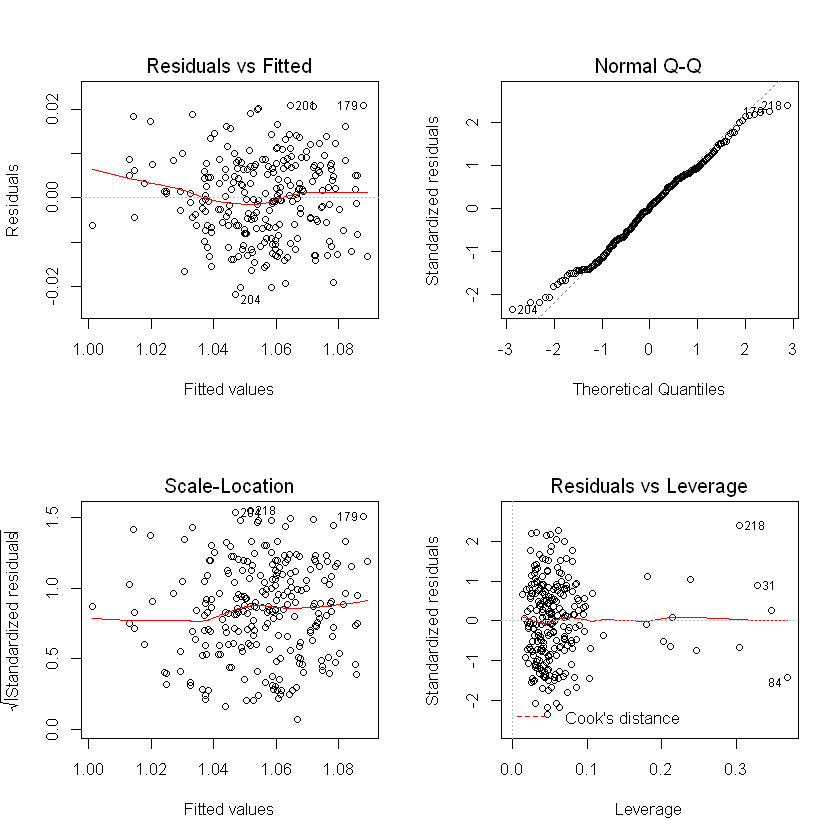

In [4]:
m = lm(DENSITY~.,data)
summary(m)
par(mfrow=c(2,2))
plot(m)

From the summary of the model, it can be seen that there exists some insignificant predictors;

Besides, we will show there is multi-colinearity relationship between design matrix.

#### Colinearity in design matrix

In [5]:
cat("The maximum vif value of design matrix X is: ",max(vif(m)),sep="")
mat = as.matrix(data[-1])
cat("\n The k condition number of design matrix X is: ",max(eigen(t(mat)%*%mat)$values)/min(eigen(t(mat)%*%mat)$values),sep="")

The maximum vif value of design matrix X is: 124.5388
 The k condition number of design matrix X is: 342589.4

Thus, for computational efficiency and multi-colinearity solution, apply step-wise regression with different directions and criteria ti do variables selection.

### Variable selection

In [12]:
n = nrow(data)
set.seed(628)
index = sample(1:n,floor(2*n/3))
train = data[index,]
test = data[-index,]
m = lm(train$DENSITY~.,train)
m.regsub = regsubsets(train$DENSITY~., train, nvmax = ncol(train[,-1]))
train.renamed = cbind(train[,-1],train[,1])
names(train.renamed)[ncol(train)] = "DENSITY"
n=nrow(train);p=ncol(train[,-1])

#### AIC criterion

In [8]:
step(m,direction="both",k=2,trace=0)


Call:
lm(formula = train$DENSITY ~ AGE + HEIGHT + CHEST + ABDOMEN + 
    HIP + THIGH + ANKLE + WRIST, data = train)

Coefficients:
(Intercept)          AGE       HEIGHT        CHEST      ABDOMEN          HIP  
  1.0568158   -0.0001900    0.0009715    0.0005219   -0.0021968    0.0008469  
      THIGH        ANKLE        WRIST  
 -0.0010962   -0.0008915    0.0049789  


In [9]:
step(m,direction="backward",k=2,trace=0)


Call:
lm(formula = train$DENSITY ~ AGE + HEIGHT + CHEST + ABDOMEN + 
    HIP + THIGH + ANKLE + WRIST, data = train)

Coefficients:
(Intercept)          AGE       HEIGHT        CHEST      ABDOMEN          HIP  
  1.0568158   -0.0001900    0.0009715    0.0005219   -0.0021968    0.0008469  
      THIGH        ANKLE        WRIST  
 -0.0010962   -0.0008915    0.0049789  


In [10]:
step(m,direction="forward",k=2,trace=0)


Call:
lm(formula = train$DENSITY ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + 
    NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + 
    FOREARM + WRIST, data = train)

Coefficients:
(Intercept)          AGE       WEIGHT       HEIGHT    ADIPOSITY         NECK  
  1.049e+00   -2.030e-04   -2.111e-05    7.554e-04   -5.747e-04    8.252e-04  
      CHEST      ABDOMEN          HIP        THIGH         KNEE        ANKLE  
  5.889e-04   -2.191e-03    1.057e-03   -1.038e-03   -2.755e-04   -7.457e-04  
     BICEPS      FOREARM        WRIST  
  9.883e-05   -6.039e-04    4.973e-03  


In [14]:
best.aic = bestglm(train.renamed, IC = "AIC")$BestModel
best.aic


Call:
lm(formula = y ~ ., data = data.frame(Xy[, c(bestset[-1], FALSE), 
    drop = FALSE], y = y))

Coefficients:
(Intercept)          AGE       HEIGHT        CHEST      ABDOMEN          HIP  
  1.0568158   -0.0001900    0.0009715    0.0005219   -0.0021968    0.0008469  
      THIGH        ANKLE        WRIST  
 -0.0010962   -0.0008915    0.0049789  


#### BIC criterion

In [17]:
step(m,direction="both",k=log(n),trace=0)


Call:
lm(formula = train$DENSITY ~ AGE + HEIGHT + ABDOMEN + HIP + THIGH + 
    WRIST, data = train)

Coefficients:
(Intercept)          AGE       HEIGHT      ABDOMEN          HIP        THIGH  
  1.0695048   -0.0001910    0.0008206   -0.0018643    0.0008464   -0.0011138  
      WRIST  
  0.0049932  


In [18]:
step(m,direction="backward",k=log(n),trace=0)


Call:
lm(formula = train$DENSITY ~ AGE + HEIGHT + ABDOMEN + HIP + THIGH + 
    WRIST, data = train)

Coefficients:
(Intercept)          AGE       HEIGHT      ABDOMEN          HIP        THIGH  
  1.0695048   -0.0001910    0.0008206   -0.0018643    0.0008464   -0.0011138  
      WRIST  
  0.0049932  


In [19]:
step(m,direction="forward",k=log(n),trace=0)


Call:
lm(formula = train$DENSITY ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + 
    NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + 
    FOREARM + WRIST, data = train)

Coefficients:
(Intercept)          AGE       WEIGHT       HEIGHT    ADIPOSITY         NECK  
  1.049e+00   -2.030e-04   -2.111e-05    7.554e-04   -5.747e-04    8.252e-04  
      CHEST      ABDOMEN          HIP        THIGH         KNEE        ANKLE  
  5.889e-04   -2.191e-03    1.057e-03   -1.038e-03   -2.755e-04   -7.457e-04  
     BICEPS      FOREARM        WRIST  
  9.883e-05   -6.039e-04    4.973e-03  


In [20]:
best.bic = bestglm(train.renamed, IC = "BIC")$BestModel

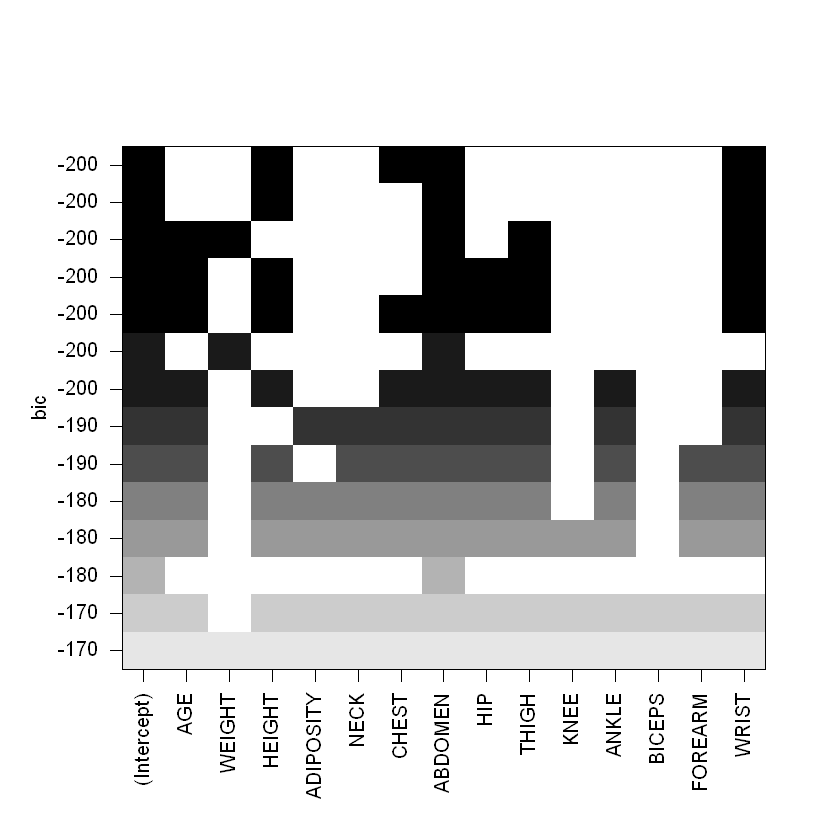

In [21]:
plot(m.regsub, scale = 'bic')

#### $R^2_{adj}$  criterion

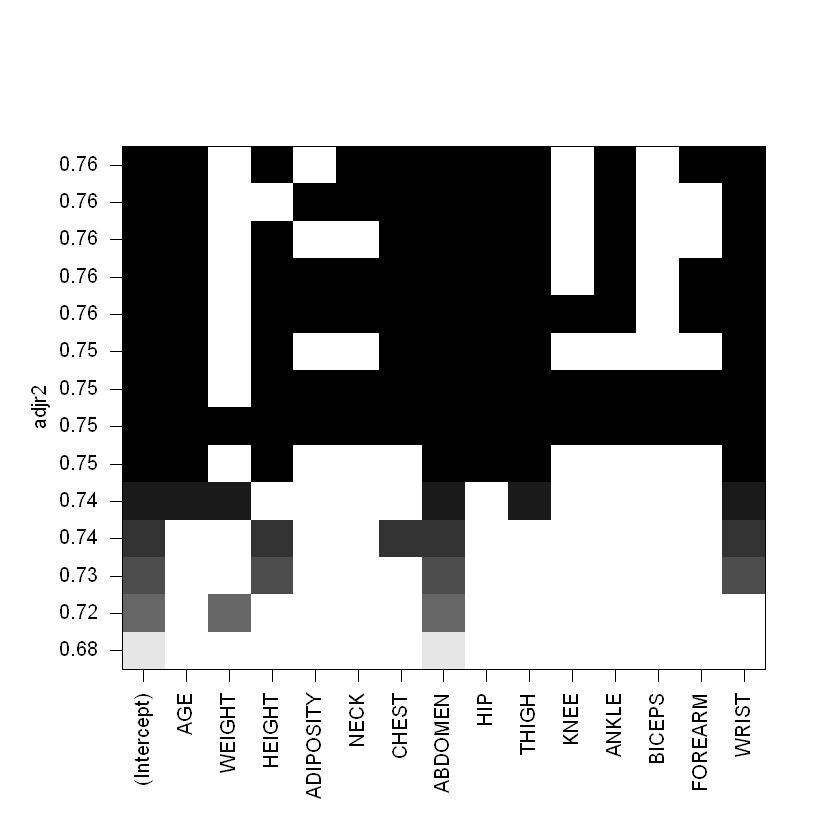

In [22]:
plot(m.regsub, scale = 'adjr2')

#### Summary

## 插入对比表格

In [26]:
ind.1 = c("AGE","HEIGHT","CHEST","ABDOMEN","HIP","THIGH",
          "ANKLE","WRIST")
ind.2 = c("AGE","HEIGHT","ABDOMEN","HIP","THIGH","WRIST" )
ind.3 = c("HEIGHT","CHEST","ABDOMEN","WRIST")
ind.4 = c("AGE","WEIGHT","NECK","CHEST","ABDOMEN","HIP",
          "THIGH","ANKLE","FOREARM","WRIST")

### Models selection

In [29]:
m1 = lm(train$DENSITY~.,train[,ind.1])
m2 = lm(train$DENSITY~.,train[,ind.2])
m3 = lm(train$DENSITY~.,train[,ind.3])
m4 = lm(train$DENSITY~.,train[,ind.4])

In [30]:
model.extract=function(model){
  r = model$residuals
  s = summary(model)
  adjr2 = s$adj.r.squared
  r2 = s$r.squared
  rss = sum(r^2)
  p.value = shapiro.test(r)$p.value
  vif = max(vif(model))
  out = c(r2,adjr2,rss/(length(r)-1),p.value,vif)
  names(out) = c("R-squared","Adjusted R-squared","MSE","p.value","vif.max")
  return(out)
}

In [45]:
comp = rbind(model.extract(m1),model.extract(m2),model.extract(m3),model.extract(m4))
rownames(comp) = paste("m",1:4,sep="")
print(comp)

   R-squared Adjusted R-squared          MSE   p.value   vif.max
m1 0.7688758          0.7570233 8.391267e-05 0.2107636 11.001687
m2 0.7584209          0.7492470 8.770847e-05 0.2225031 10.481320
m3 0.7455770          0.7392164 9.237163e-05 0.1690408  6.903176
m4 0.7659161          0.7507158 8.498725e-05 0.2185296 21.272835


model 1 diagnostic graphics:


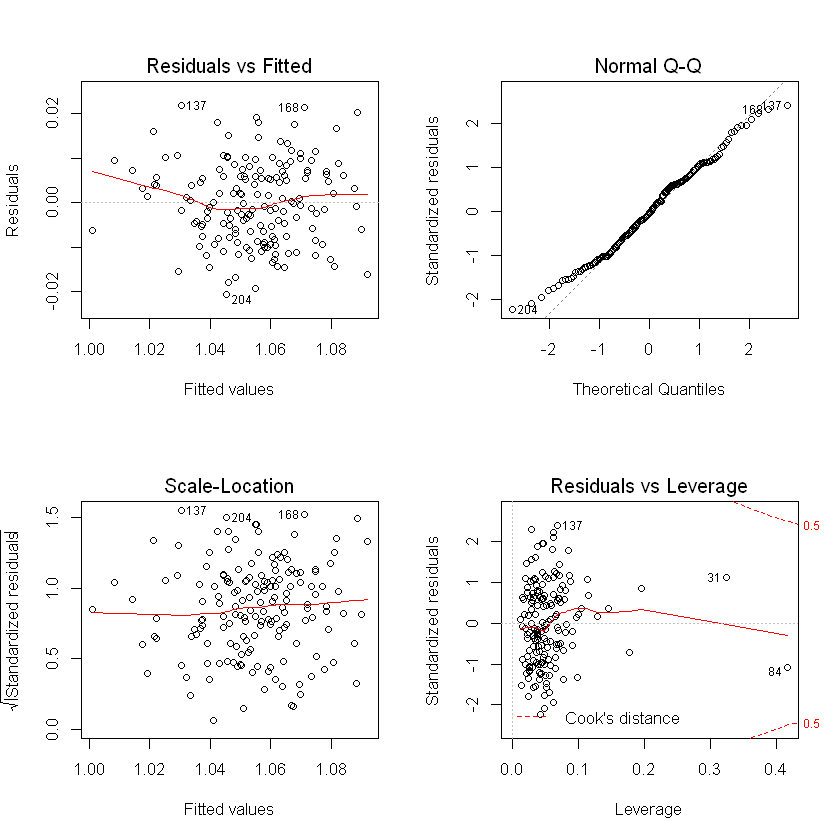

In [33]:
par(mfrow=c(2,2))
cat("model 1 diagnostic graphics:\n")
plot(m1)

model 2 diagnostic graphics:


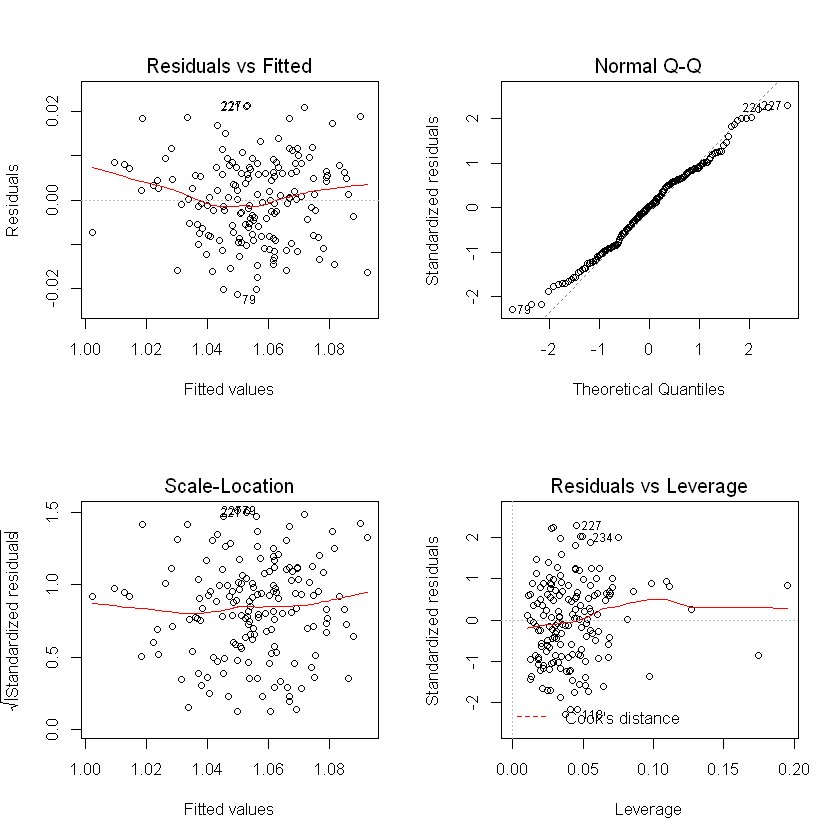

In [36]:
par(mfrow=c(2,2))
cat("model 2 diagnostic graphics:\n")
plot(m2)

model 3 diagnostic graphics:


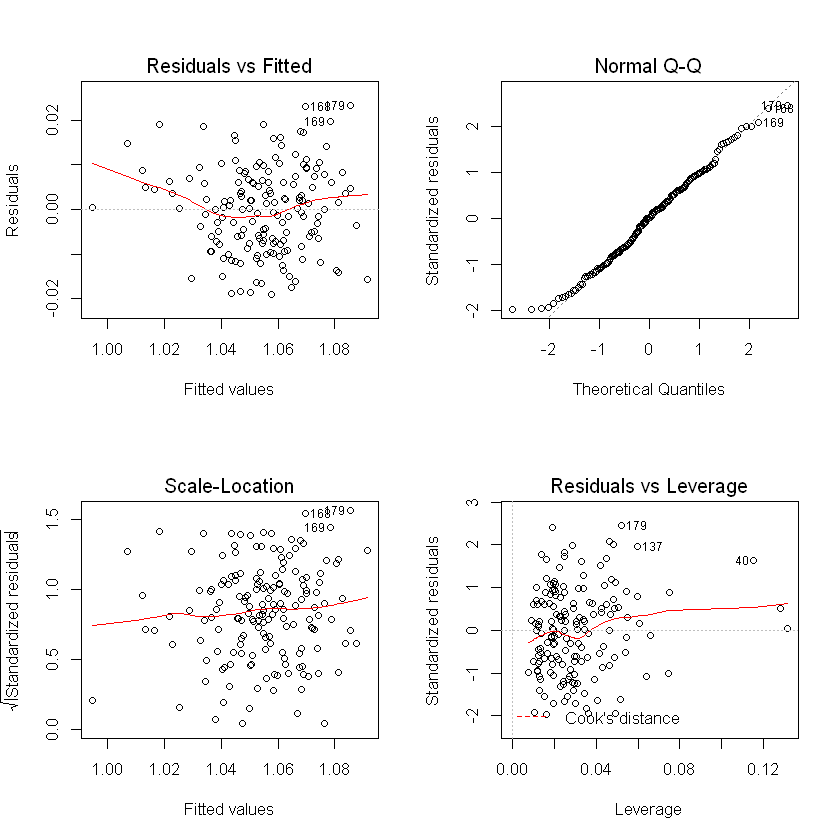

In [37]:
par(mfrow=c(2,2))
cat("model 3 diagnostic graphics:\n")
plot(m3)

model 4 diagnostic graphics:


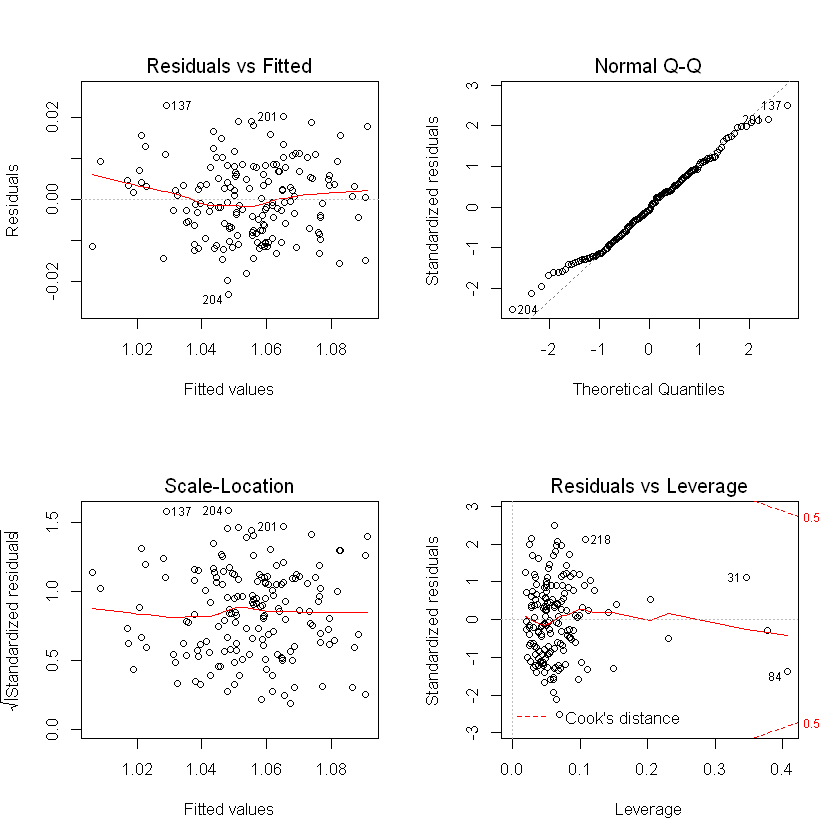

In [38]:
par(mfrow=c(2,2))
cat("model 4 diagnostic graphics:\n")
plot(m4)

#### test set

In [39]:
calculate = function(model,ind){
  test.X = test[,ind]
  y = test$DENSITY
  y.hat = predict.lm(model,test.X)
  r = y-y.hat
  rss = sum(r^2)
  sst = sum((y-mean(y))^2)
  r2 = 1-rss/sst
  adjr2 = 1-(rss/(nrow(test.X)-1))/(sst/(nrow(test.X)-ncol(test.X)-1))
  p.value = shapiro.test(r)$p.value
  outcome = list("R-squared"=r2,
                 "Adjusted R-squared"=adjr2,
                 "p.value"=p.value,
                 "residuals"=r)
  return(outcome)
}
o1 = calculate(m1,ind.1)
o2 = calculate(m2,ind.2)
o3 = calculate(m3,ind.3)
o4 = calculate(m4,ind.4)

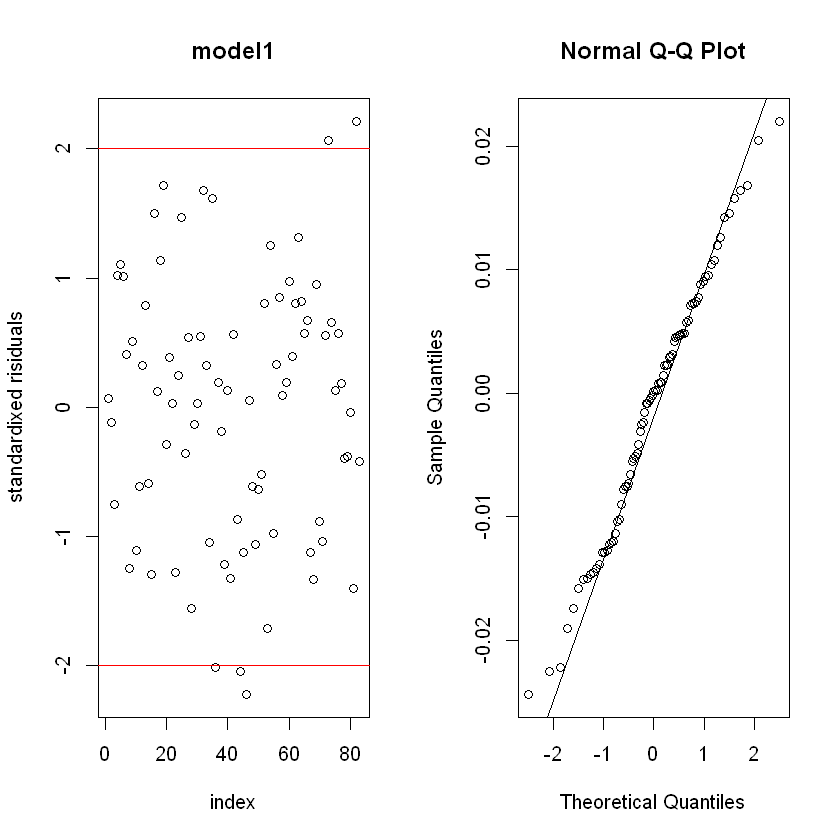

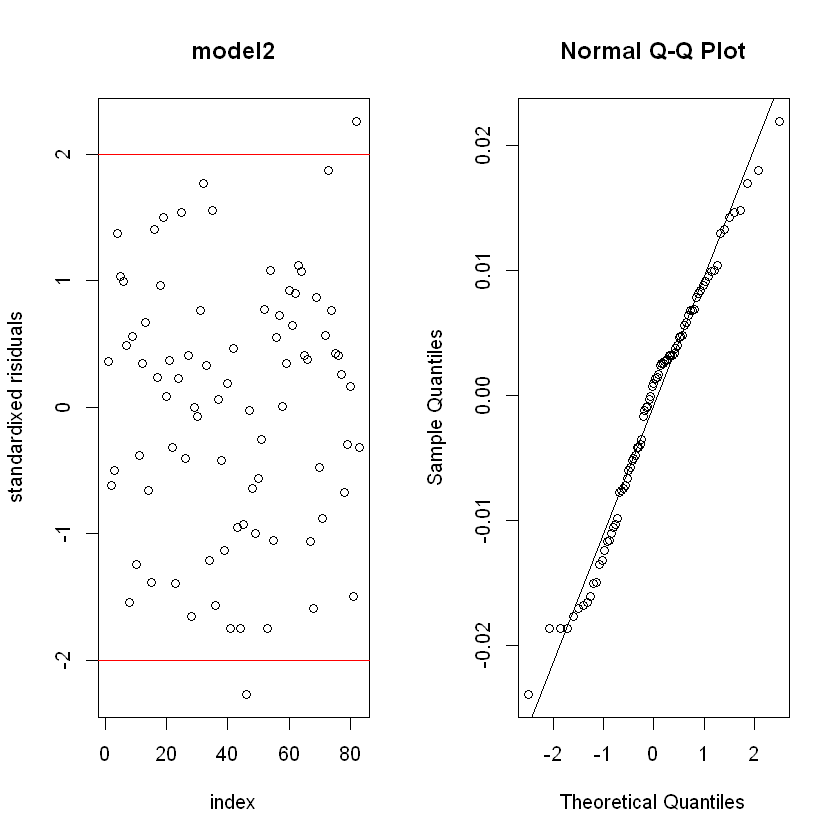

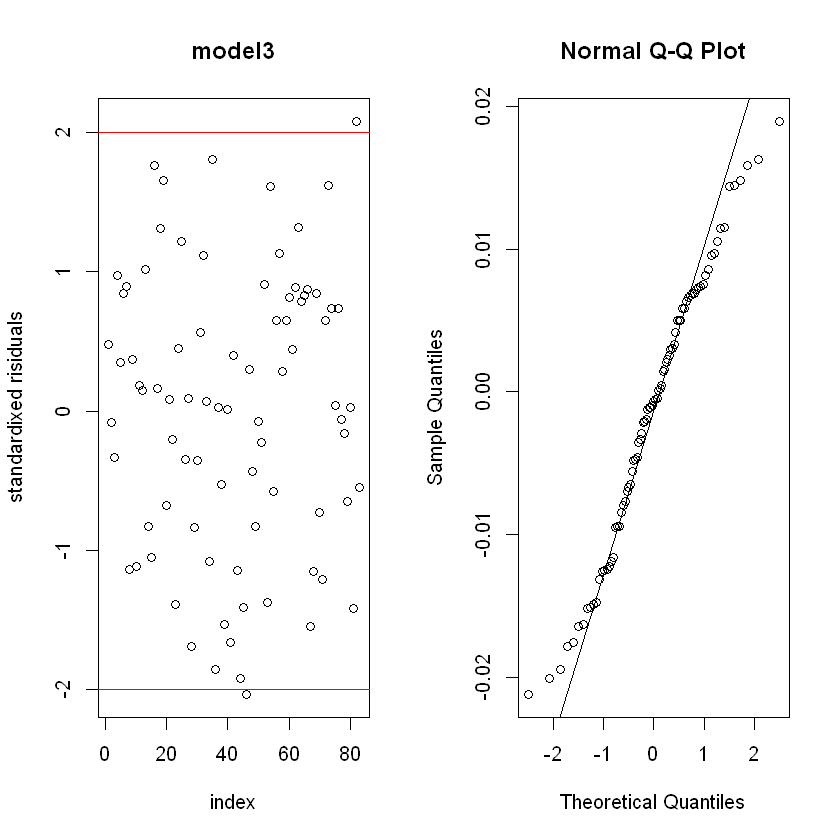

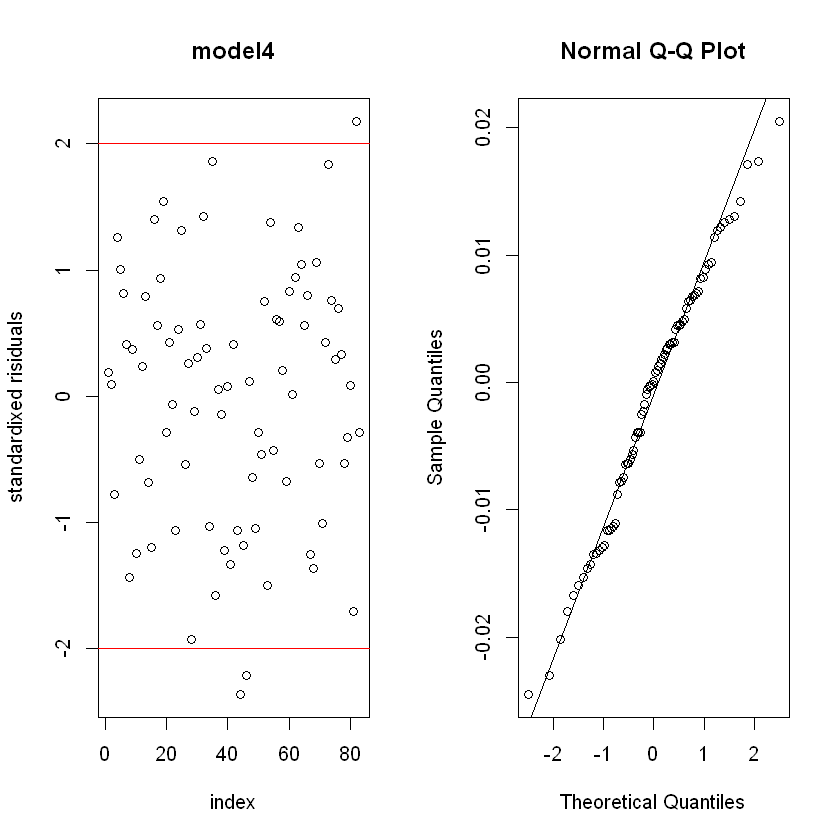

In [59]:
plot.m = function(o,i){
    par(mfrow=c(1,2))
    r = o$residuals
    plot(scale(r),xlab="index",ylab="standardixed risiduals",main=paste("model",i,sep=""))
    abline(h=2,col="red")
    abline(h=-2,col="red")
    
    qqnorm(r)
    qqline(r)
}

plot.m(o1,1)
plot.m(o2,2)
plot.m(o3,3)
plot.m(o4,4)

In [60]:
comp.test = rbind(c(o1$`R-squared`,o1$`Adjusted R-squared`,sum(o1$residuals^2)/(nrow(test)-1),o1$p.value),
                  c(o2$`R-squared`,o2$`Adjusted R-squared`,sum(o2$residuals^2)/(nrow(test)-1),o2$p.value),
                  c(o3$`R-squared`,o3$`Adjusted R-squared`,sum(o3$residuals^2)/(nrow(test)-1),o3$p.value),
                  c(o4$`R-squared`,o4$`Adjusted R-squared`,sum(o4$residuals^2)/(nrow(test)-1),o4$p.value))
colnames(comp.test) = c("R-squared","Adjusted R-squared","MSE","p.value")
rownames(comp.test) = paste("m",1:4,sep="")

In [61]:
cat("models' performances on the training set:\n")
print(comp)
cat("\nmodels' performances on the test set:\n")
print(comp.test)

models' performances on the training set:
   R-squared Adjusted R-squared          MSE   p.value   vif.max
m1 0.7688758          0.7570233 8.391267e-05 0.2107636 11.001687
m2 0.7584209          0.7492470 8.770847e-05 0.2225031 10.481320
m3 0.7455770          0.7392164 9.237163e-05 0.1690408  6.903176
m4 0.7659161          0.7507158 8.498725e-05 0.2185296 21.272835

models' performances on the test set:
   R-squared Adjusted R-squared          MSE   p.value
m1 0.6509054          0.6849634 1.109101e-04 0.5463155
m2 0.6754095          0.6991600 1.031250e-04 0.2830763
m3 0.6941605          0.7090795 9.716761e-05 0.1932250
m4 0.6873796          0.7255040 9.932198e-05 0.4851142
